## Imports



In [ ]:
import datetime
import pandas as pd

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [ ]:
googletrends_df = pd.read_csv('/content/drive/MyDrive/time_series/googletrends_chipotle2013.csv', skiprows = [0,1], parse_dates=["Week"])

In [ ]:
googletrends_df

,Week,chipotle: (United States)
0,2013-10-06,37
1,2013-10-13,39
2,2013-10-20,38
3,2013-10-27,55
4,2013-11-03,40
...,...,...
258,2018-09-16,45
259,2018-09-23,48
260,2018-09-30,50
261,2018-10-07,48


# Prophet Forecast

In [ ]:
prophetdata = pd.DataFrame()
prophetdata['y'] = googletrends_df['chipotle: (United States)']
prophetdata['ds'] = googletrends_df['Week']

In [ ]:
# holidays 
#https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#fourier-order-for-seasonalities

# can write functions that we can add before fitting ^^
# cinco de mayo 
# national taco day october 4
# national burrito day april 1
more_holidays = pd.DataFrame({'holiday':'spl_events','ds':pd.to_datetime(['2013-05-05','2014-05-05','2015-05-05','2016-05-05','2017-05-05',
                                                                          '2018-05-05','2013-10-04','2014-10-04','2015-10-04','2016-10-04',
                                                                          '2017-10-04','2018-10-04','2013-04-01','2014-04-01','2015-04-01',
                                                                          '2016-04-01','2017-04-01','2018-04-01']),
                              'lower_window':0, 'upper_window':0,})

In [ ]:
# considering holidays for sales 
# can also manually enter dates 

# seasonality 
# monthly


m = Prophet()
m.add_country_holidays(country_name='US')
#m.add_regressor(holidays = more_holdiays)
m.fit(prophetdata)
future = m.make_future_dataframe(periods=52, freq='W') # this is seasonality 
future.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
310,2019-09-15
311,2019-09-22
312,2019-09-29
313,2019-10-06
314,2019-10-13


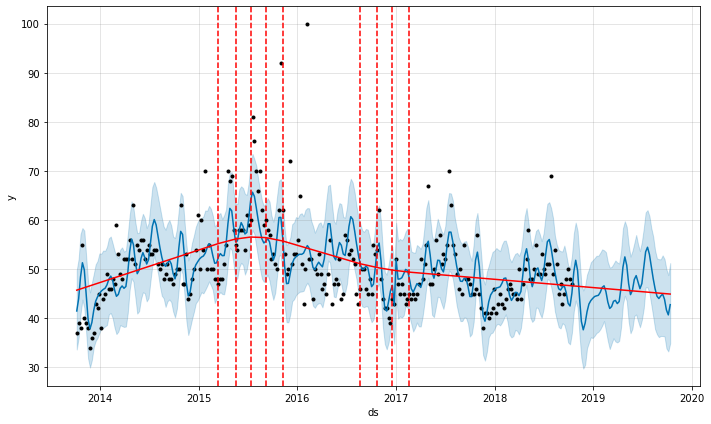

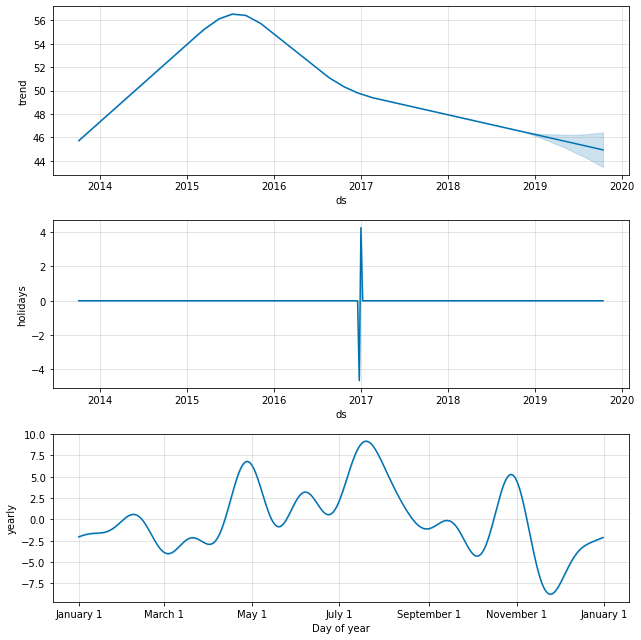

In [ ]:
forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)


# start by looking at this plot and then looking at how much data is captured by the arrow bars 
# do most of the dots fall within the light blue shaded regions ?

# Holidays and Changepoints in Prophet

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


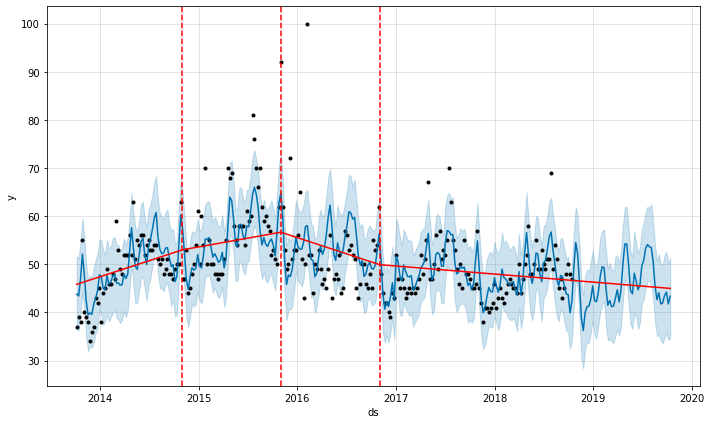

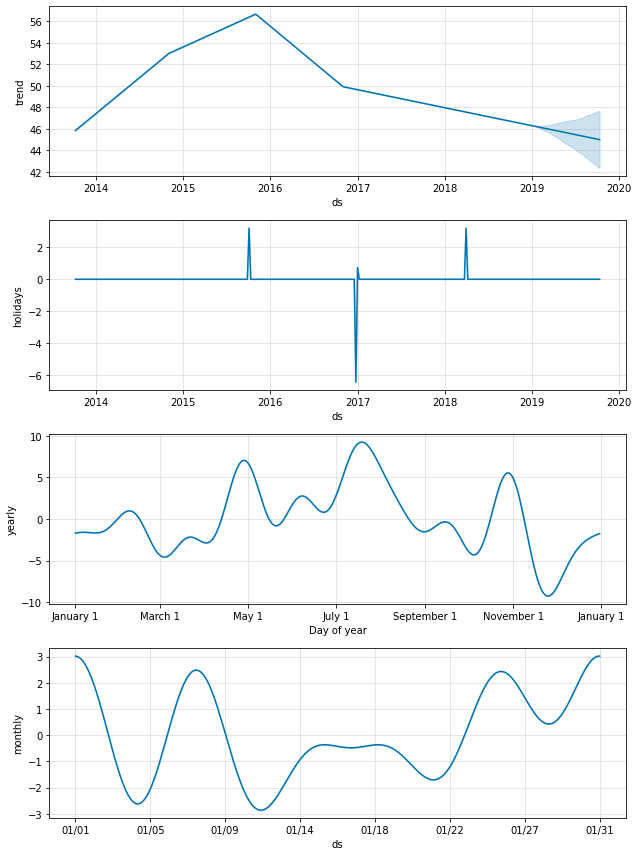

In [73]:
changepoints = ['2013-11-01', '2014-11-01', '2015-11-01', '2016-11-01', '2017-11-01']
# by specifying the change points you can see these are the periods that we expecgt a significant change to occur
# prophet will test those dates to see if they are significant and if they arent they are not kept in the model 
# less change points are ususally better ^ 
m = Prophet(changepoints = changepoints, holidays=more_holidays) #  took this out for test changepoints=changepoints
m.add_country_holidays(country_name='US') # need to add certain holidays like cinco de mayo and national burrito days etc
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(prophetdata)
future = m.make_future_dataframe(periods=52, freq='W') # trained on 4 years and tested on 5
forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


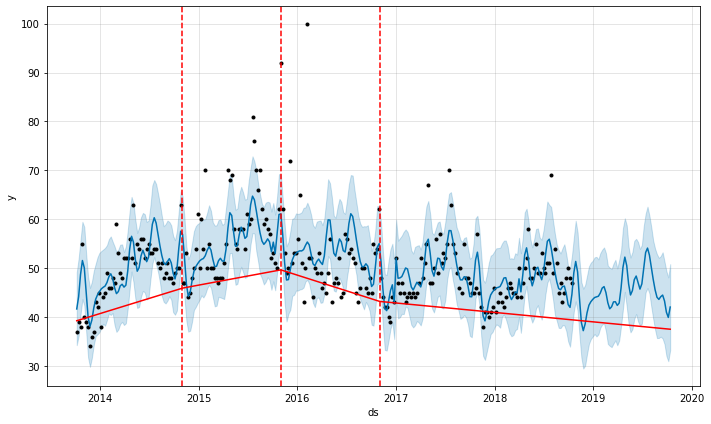

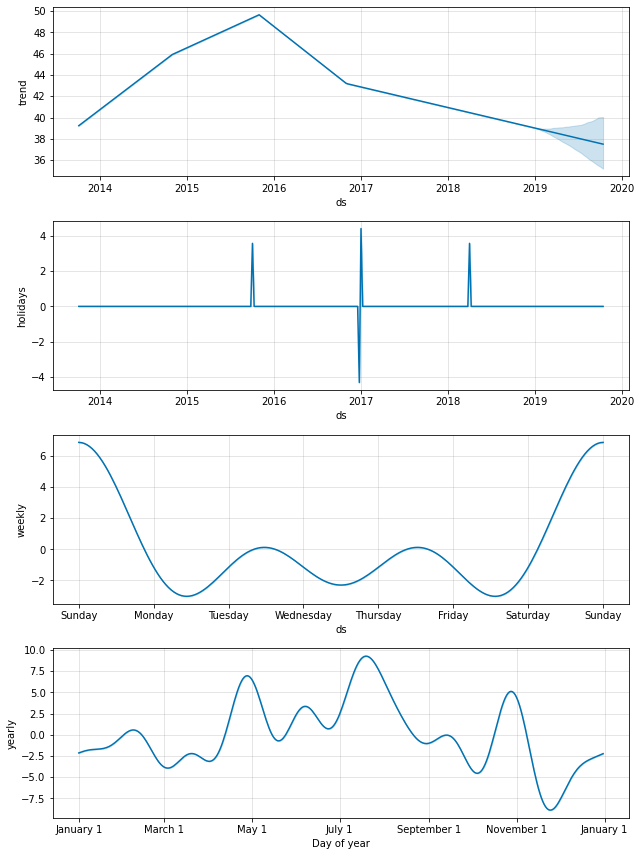

In [ ]:
# adding seasonality 

changepoints = ['2013-11-01', '2014-11-01', '2015-11-01', '2016-11-01', '2017-11-01']
# by specifying the change points you can see these are the periods that we expecgt a significant change to occur
# prophet will test those dates to see if they are significant and if they arent they are not kept in the model 
# less change points are ususally better ^ 
m = Prophet(changepoints=changepoints, holidays=more_holidays, weekly_seasonality= True, yearly_seasonality= True)
m.add_country_holidays(country_name='US') # need to add certain holidays like cinco de mayo and national burrito days etc
m.fit(prophetdata)
future = m.make_future_dataframe(periods=52, freq='W')
forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)

In [ ]:
#from fbPr import cross_validation
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-10-25 00:00:00 and 2017-10-14 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-11-01,61.244245,55.183968,66.720050,92,2015-10-25
1,2015-11-08,58.805388,52.968656,64.786167,62,2015-10-25
2,2015-11-15,54.307655,48.986396,60.081121,53,2015-10-25
3,2015-11-22,50.930967,45.424701,57.450878,49,2015-10-25
4,2015-11-29,51.050344,45.454124,57.293993,50,2015-10-25


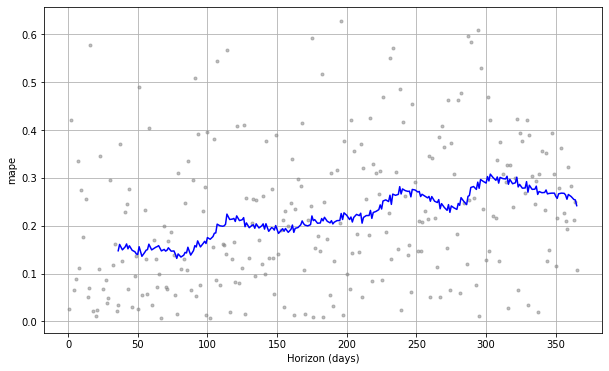

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

cross_validation_results = cross_validation(m, initial='1460 days', period='15 days', horizon='70 days')
# inital is training period
# horizon is forecast horizon
# period is spacing between cutoff days
print(cross_validation_results)


performance_metrics_results = performance_metrics(cross_validation_results)
print(performance_metrics_results)

INFO:fbprophet:Making 21 forecasts with cutoffs between 2017-10-09 00:00:00 and 2018-08-05 00:00:00



            ds       yhat  yhat_lower  yhat_upper   y     cutoff
0   2017-10-15  46.178631   38.546611   54.547290  45 2017-10-09
1   2017-10-22  51.114377   42.297845   59.591875  46 2017-10-09
2   2017-10-29  53.000523   44.428306   61.493141  57 2017-10-09
3   2017-11-05  49.934254   41.744620   58.610157  45 2017-10-09
4   2017-11-12  44.024168   36.061727   52.399479  42 2017-10-09
..         ...        ...         ...         ...  ..        ...
205 2018-09-16  44.581845   36.338114   52.252178  45 2018-08-05
206 2018-09-23  41.971337   33.756278   49.975032  48 2018-08-05
207 2018-09-30  38.913688   30.349478   47.051051  50 2018-08-05
208 2018-10-07  38.449627   30.056603   46.645149  48 2018-08-05
209 2018-10-14  41.891897   33.779044   49.877474  47 2018-08-05

[210 rows x 6 columns]
   horizon        mse      rmse       mae      mape     mdape  coverage
0   7 days  12.507747  3.536629  2.903005  0.060364  0.046145  1.000000
1   8 days  25.629204  5.062529  3.521872  0.068073

In [ ]:
type(performance_metrics_results)

pandas.core.frame.DataFrame

In [ ]:
print("rmse:",performance_metrics_results['rmse'].mean())
print("mae:", performance_metrics_results['mae'].mean())
print("mse:", performance_metrics_results['mse'].mean())
print("mape:", performance_metrics_results['mape'].mean())




rmse: 4.797887210304801
mae: 3.6754105862948636
mse: 23.54547270857852
mape: 0.07384891802193355


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mean_squared_error(cross_validation_results.y, cross_validation_results.yhat)

23.497249315336152

In [ ]:
print(m.ssr)

AttributeError: ignored

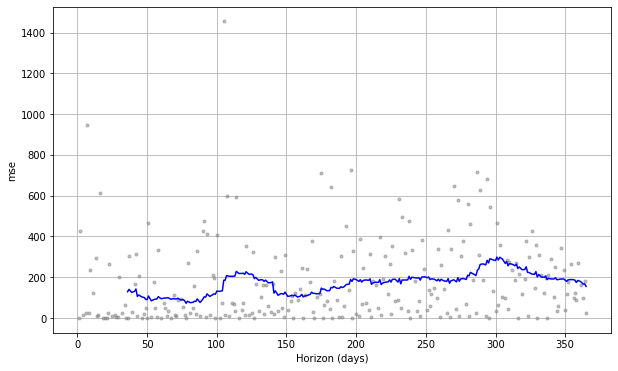

In [74]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mse')

In [ ]:
accuracy(test["ds"],m["yhat"].values)

NameError: ignored

In [ ]:
ax = googletrends['chipotle: (United States)'].plot(label='chipotle observed searches')
pred.predicted_mean.plot(ax=ax, label='forecast', alpha=.7, figsize=(15, 4))
plt.legend()
plt.show()